In [61]:
import cv2
import os
import torch
from torch.utils import data
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from torchvision.transforms import InterpolationMode
import pandas as pd
import pytorch_lightning as pl
from torchvision.io import read_image
import matplotlib.pyplot as plt
%matplotlib inline

## Constructing the CSV and Getting Count Labels
**NOTE**: This file is in our folder with the pictures

In [62]:
DIR = os.listdir('/Users/maxinexu/Desktop/chest_xray/')
print(DIR)

test_path = './test'
train_path = './train'
val_path = './val'
paths = [test_path, train_path, val_path]

def get_dimensions(img_path):
    img = read_image(img_path)
    return img.shape


['.DS_Store', 'test', 'xray_project.ipynb', 'train', 'img_info.csv', '.ipynb_checkpoints', 'val']


In [3]:
img_data = {}
for path in paths:
    nml_path = os.listdir(path + '/NORMAL')
    pn_path = os.listdir(path + '/PNEUMONIA')
    if 'test' in path:
        print('Testing Data Normal Count: {}'.format(len(nml_path)))
        print('Testing Data Pneumonia Count: {}'.format(len(pn_path)))
        data_type = 'Test'
    elif 'train' in path: 
        print('Training Data Normal Count: {}'.format(len(nml_path)))
        print('Training Data Pneumonia Count: {}'.format(len(pn_path)))
        data_type = 'Train'
    else:
        print('Validation Data Normal Count: {}'.format(len(nml_path)))
        print('Validation Data Pneumonia Count: {}'.format(len(pn_path)))
        data_type = 'Validation'
    for img in nml_path:
        img_path = path + '/NORMAL/' + img
        lyr, hgt, wdh = get_dimensions(img_path)
        img_data[img] = {'path': img_path, 'dimensions': (hgt, wdh), 'height': hgt, 'width': wdh, 'layers': lyr, 'data': data_type, 'label': 0}
    for img in pn_path: 
        img_path = path + '/PNEUMONIA/' + img
        lyr, hgt, wdh = get_dimensions(img_path)
        img_data[img] = {'path': img_path, 'dimensions': (hgt, wdh), 'height': hgt, 'width': wdh, 'layers': lyr, 'data': data_type, 'label': 1}


Testing Data Normal Count: 234
Testing Data Pneumonia Count: 390
Training Data Normal Count: 1341
Training Data Pneumonia Count: 3875
Validation Data Normal Count: 8
Validation Data Pneumonia Count: 8


In [7]:
img_info = pd.DataFrame.from_dict(img_data, orient='index')
img_info = img_info.reset_index().rename(columns={'index':'img_name'})
img_info

,img_name,path,dimensions,height,width,layers,data,label
0,IM-0031-0001.jpeg,./test/NORMAL/IM-0031-0001.jpeg,"(1632, 1949)",1632,1949,1,Test,0
1,IM-0025-0001.jpeg,./test/NORMAL/IM-0025-0001.jpeg,"(2458, 2720)",2458,2720,1,Test,0
2,NORMAL2-IM-0272-0001.jpeg,./test/NORMAL/NORMAL2-IM-0272-0001.jpeg,"(917, 1340)",917,1340,1,Test,0
3,NORMAL2-IM-0102-0001.jpeg,./test/NORMAL/NORMAL2-IM-0102-0001.jpeg,"(2152, 2366)",2152,2366,1,Test,0
4,NORMAL2-IM-0229-0001.jpeg,./test/NORMAL/NORMAL2-IM-0229-0001.jpeg,"(1168, 1488)",1168,1488,1,Test,0
...,...,...,...,...,...,...,...,...
5851,person1946_bacteria_4874.jpeg,./val/PNEUMONIA/person1946_bacteria_4874.jpeg,"(592, 968)",592,968,1,Validation,1
5852,person1947_bacteria_4876.jpeg,./val/PNEUMONIA/person1947_bacteria_4876.jpeg,"(664, 1152)",664,1152,1,Validation,1
5853,person1946_bacteria_4875.jpeg,./val/PNEUMONIA/person1946_bacteria_4875.jpeg,"(712, 1072)",712,1072,1,Validation,1
5854,person1949_bacteria_4880.jpeg,./val/PNEUMONIA/person1949_bacteria_4880.jpeg,"(944, 1416)",944,1416,1,Validation,1


In [11]:
print('Count of unique images sizes: {}'.format(len(img_info['dimensions'].unique())))

Count of unique images sizes: 4803


In [12]:
test_df = img_info.loc[img_info.loc[:, 'data'] == 'Test']
train_df = img_info.loc[img_info.loc[:, 'data'] == 'Train']
val_df = test_df = img_info.loc[img_info.loc[:, 'data'] == 'Validation']

In [12]:
img_info.to_csv('./img_info.csv', index=False)

In [13]:
pd.read_csv('./img_info.csv')

,img_name,path,dimensions,height,width,layers,data,label
0,IM-0031-0001.jpeg,./test/NORMAL/IM-0031-0001.jpeg,"(1632, 1949)",1632,1949,1,Test,0
1,IM-0025-0001.jpeg,./test/NORMAL/IM-0025-0001.jpeg,"(2458, 2720)",2458,2720,1,Test,0
2,NORMAL2-IM-0272-0001.jpeg,./test/NORMAL/NORMAL2-IM-0272-0001.jpeg,"(917, 1340)",917,1340,1,Test,0
3,NORMAL2-IM-0102-0001.jpeg,./test/NORMAL/NORMAL2-IM-0102-0001.jpeg,"(2152, 2366)",2152,2366,1,Test,0
4,NORMAL2-IM-0229-0001.jpeg,./test/NORMAL/NORMAL2-IM-0229-0001.jpeg,"(1168, 1488)",1168,1488,1,Test,0
...,...,...,...,...,...,...,...,...
5851,person1946_bacteria_4874.jpeg,./val/PNEUMONIA/person1946_bacteria_4874.jpeg,"(592, 968)",592,968,1,Validation,1
5852,person1947_bacteria_4876.jpeg,./val/PNEUMONIA/person1947_bacteria_4876.jpeg,"(664, 1152)",664,1152,1,Validation,1
5853,person1946_bacteria_4875.jpeg,./val/PNEUMONIA/person1946_bacteria_4875.jpeg,"(712, 1072)",712,1072,1,Validation,1
5854,person1949_bacteria_4880.jpeg,./val/PNEUMONIA/person1949_bacteria_4880.jpeg,"(944, 1416)",944,1416,1,Validation,1


## Transforming the Data

In [42]:
class CustomImageDataset(Dataset):
    def __init__(self, df, img_dir_path, transforms=None):
        """
        You can set your custom dataset to take in more parameters than specified
        here. But, I recommend at least you start with the three I listed here,
        as these are standard

        csv_file (str): file path to the csv file you created /
        df (pandas df): pandas dataframe

        img_dir_path: directory path to your images
        transform: Compose (a PyTorch Class) that strings together several
          transform functions (e.g. data augmentation steps)

        One thing to note -- you technically could implement `transform` within
        the dataset. No one is going to stop you, but you can think of the
        transformations/augmentations you do as a hyperparameter. If you treat
        it as a hyperparameter, you want to be able to experiment with different
        transformations, and therefore, it would make more sense to decide those
        transformations outside the dataset class and pass it to the dataset!
        """
        self.img_labels = df
        self.img_dir = img_dir_path
        self.transforms = transforms
        
    def __len__(self):
        """
        Returns: (int) length of your dataset
        """
        return len(self.img_labels)

    def __getitem__(self, idx):
        """
        Loads and returns your sample (the image and the label) at the
        specified index

        Parameter: idx (int): index of interest

        Returns: image, label
        """

        img_path =  self.img_labels.iloc[idx, 1]
        
        image =read_image(img_path)

        label = self.img_labels.iloc[idx, -1]

        if self.transforms:
            image = transforms(image)

        return image, label

In [47]:


transforms = T.Compose(
    [
        T.Resize((224,224), antialias=None, interpolation=InterpolationMode.BICUBIC),
        T.RandomAdjustSharpness(sharpness_factor=2),
        T.GaussianBlur(kernel_size=(5,5), sigma=(0.1, 0.2)),
        T.RandomEqualize()
    ]
)

## Transformations on an example image

torch.Size([1, 1317, 1857])


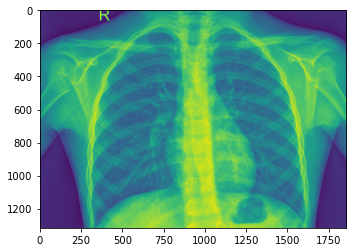

In [50]:
img = read_image('./test/NORMAL/IM-0001-0001.jpeg')
print(img.shape)
plt.imshow(img.permute(1, 2, 0))

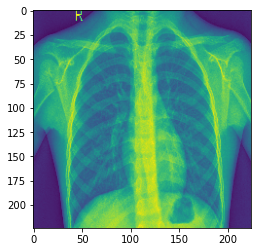

In [51]:
img = T.Resize((224,224), antialias=None, interpolation=InterpolationMode.BICUBIC)(img)
plt.imshow(img.permute(1, 2, 0))

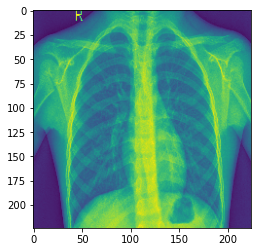

In [53]:
img = T.GaussianBlur(kernel_size=(5,5), sigma=(0.1, 0.2))(img)
plt.imshow(img.permute(1, 2, 0))

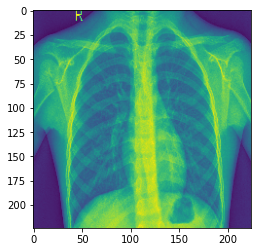

In [55]:
img = T.RandomEqualize()(img)
plt.imshow(img.permute(1, 2, 0))

## Loading the Data

In [56]:
training_data = CustomImageDataset(train_df, train_path, transforms)
val_data = CustomImageDataset(val_df, val_path, transforms)
test_data = CustomImageDataset(test_df, test_path, transforms)

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)